   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6
Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64


C:\Users\gkhya\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\gkhya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gkhya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gkhya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  

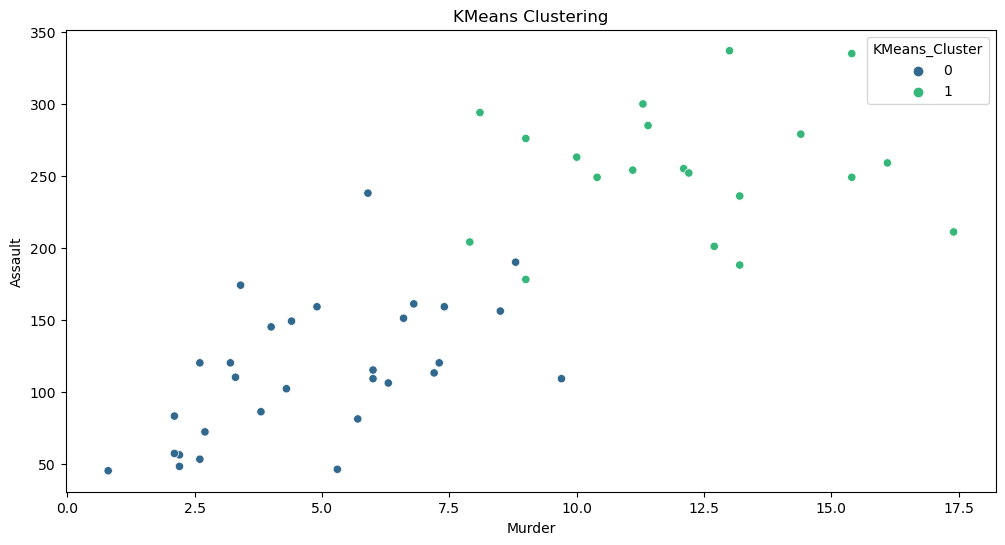

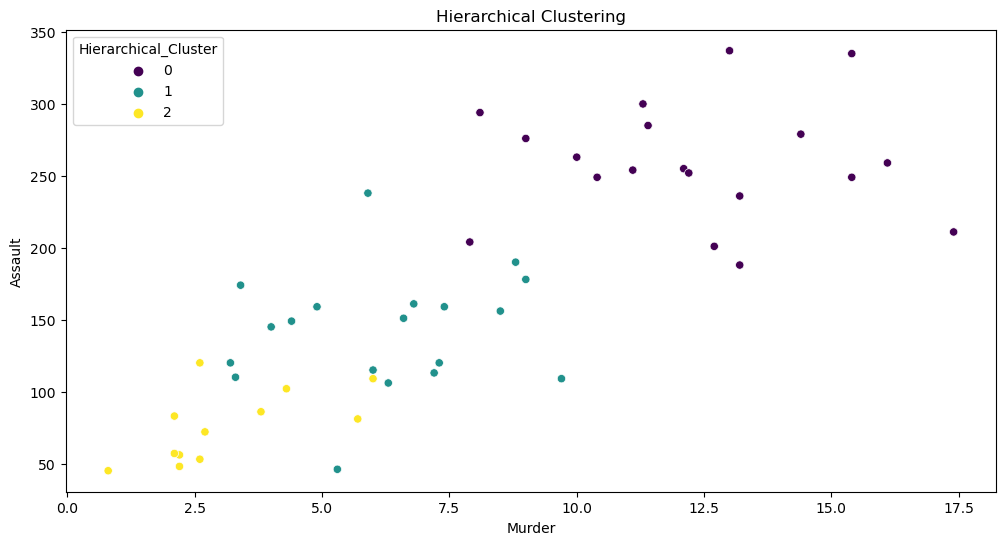

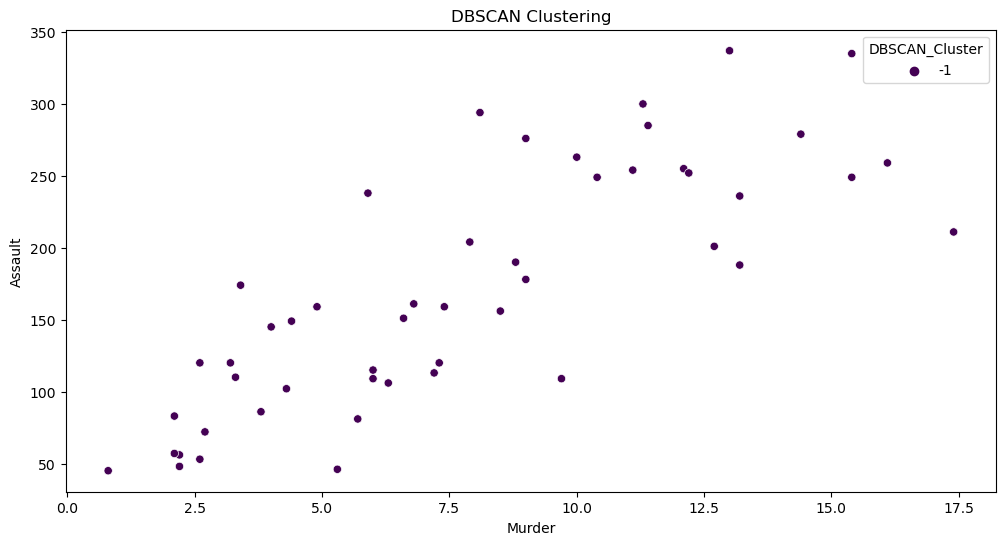

Number of clusters formed by Hierarchical Clustering: 3
Number of clusters formed by KMeans Clustering: 2
Number of clusters formed by DBSCAN Clustering: 1


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
crime_data = pd.read_csv('crime_data.csv')

# Display the first few rows of the dataset and check for any missing values
print(crime_data.head())
print(crime_data.isnull().sum())

# Separate state names from numerical data
state_names = crime_data['Unnamed: 0']
numerical_data = crime_data.drop(columns=['Unnamed: 0'])

# Preprocess the numerical data by scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Perform Hierarchical clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
crime_data['Hierarchical_Cluster'] = hierarchical_cluster.fit_predict(scaled_data)

# Perform KMeans clustering and find the optimal number of clusters
kmeans_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    kmeans_scores.append(silhouette_score(scaled_data, kmeans.labels_))

optimal_clusters = np.argmax(kmeans_scores) + 2  # Adding 2 because of zero-based indexing

# Fit KMeans with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
crime_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
crime_data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Visualize the clusters formed by KMeans
plt.figure(figsize=(12, 6))
sns.scatterplot(data=crime_data, x='Murder', y='Assault', hue='KMeans_Cluster', palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

# Visualize the clusters formed by Hierarchical clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=crime_data, x='Murder', y='Assault', hue='Hierarchical_Cluster', palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

# Visualize the clusters formed by DBSCAN
plt.figure(figsize=(12, 6))
sns.scatterplot(data=crime_data, x='Murder', y='Assault', hue='DBSCAN_Cluster', palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

# Print the number of clusters formed by each method
print("Number of clusters formed by Hierarchical Clustering:", crime_data['Hierarchical_Cluster'].nunique())
print("Number of clusters formed by KMeans Clustering:", crime_data['KMeans_Cluster'].nunique())
print("Number of clusters formed by DBSCAN Clustering:", crime_data['DBSCAN_Cluster'].nunique())
